In [ ]:
!pip install cmake
!pip install dlib
!pip install face_recognition 

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=4f5e18374032c9b03db4b19a3688a03180a1da217dc71b3d798b2ae703b8db8c
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


임베딩 기법
* 텍스트, 이미지, 오디오와 같이 구조화되지 않은 데이터
* 사용자가 시청한 영화 목록 및 사용자 ID와 같이 상호 작용 컨텍스트만 있고 입력 특성이 없는 항목
* 그래프 및 네트워크와 같은 복잡한 구조 데이터. 예: 소셜 네트워크 및 생화학 화합물
* 텍스트 설명을 사용한 이미지 검색 및 이미지 캡션 작성과 같은 다중 모달 변환
* 위치 및 점유와 같은 희소 특성(이를 밀집 특성으로 변환)
* 인구통계, 사회, 금융, 행동 속성이 300개 이상 포함된 고객 레코드와 같은 고차원 항목



In [ ]:
!mkdir /content/images

mkdir: cannot create directory ‘/content/images’: File exists


In [ ]:
!mkdir /content/face_embedding/images
!wget https://aiffelstaticprd.blob.core.windows.net/media/documents/biden.jpg
!wget https://aiffelstaticprd.blob.core.windows.net/media/documents/bush.jpeg
!wget https://aiffelstaticprd.blob.core.windows.net/media/documents/clinton.jpeg 
!wget https://aiffelstaticprd.blob.core.windows.net/media/documents/obama.jpg
!wget https://aiffelstaticprd.blob.core.windows.net/media/documents/trump.jpg
!mv biden.jpg bush.jpeg clinton.jpeg obama.jpg trump.jpg /content/images

mkdir: cannot create directory ‘/content/face_embedding/images’: No such file or directory
--2020-09-10 04:20:59--  https://aiffelstaticprd.blob.core.windows.net/media/documents/biden.jpg
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
Connecting to aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 507871 (496K) [image/jpeg]
Saving to: ‘biden.jpg’

biden.jpg           100%[===================>] 495.97K   293KB/s    in 1.7s    

2020-09-10 04:21:02 (293 KB/s) - ‘biden.jpg’ saved [507871/507871]

--2020-09-10 04:21:02--  https://aiffelstaticprd.blob.core.windows.net/media/documents/bush.jpeg
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
Connecting to aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... connected.
HTTP

In [ ]:
import face_recognition
import os 

image_path = '/content/images/'
obama_image_path = image_path + 'obama.jpg'

#load image
image = face_recognition.load_image_file(obama_image_path)
face_location = face_recognition.face_locations(image)

#face location
print(face_location)

[(98, 758, 284, 572)]


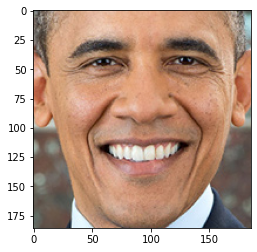

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

t,l,b,r = face_location[0]
cropped_face = image[t:b,r:l,:]

plt.imshow(cropped_face)

In [ ]:
def get_cropped_image(image_file_path):
    image = face_recognition.load_image_file(image_file_path)
    face_location = face_recognition.face_locations(image)
    
    t,l,b,r = face_location[0]
    cropped_face = image[t:b,r:l,:]

    return cropped_face
#이미지로부터 얼굴 영역을 가져오는 함수 

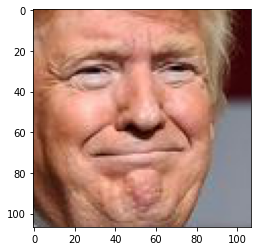

In [ ]:
trump_image_path = image_path + 'trump.jpg'
plt.imshow(get_cropped_image(trump_image_path))

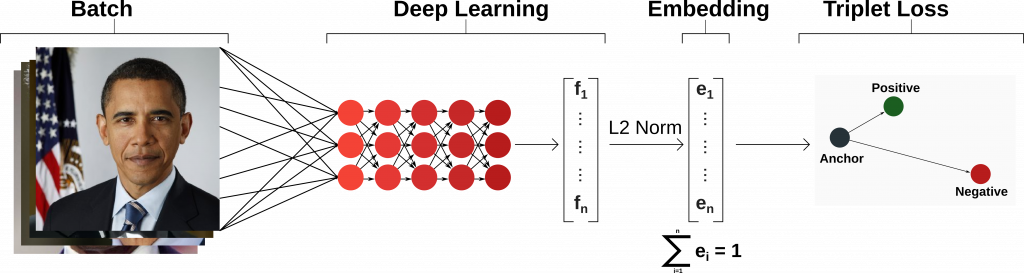

In [ ]:
file_list = os.listdir('/content/images')

print("file list:{}".format(file_list))

file list:['bush.jpeg', 'obama.jpg', 'biden.jpg', 'trump.jpg', '.ipynb_checkpoints', 'clinton.jpeg']


In [ ]:
def cropped_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = cropped_face_embedding(get_cropped_image(trump_image_path))
embedding
#얼굴 영역으로부터 얼굴 임베딩 벡터를 구하는 함수 

[array([-0.15962476,  0.20268641,  0.03236365,  0.02439226, -0.06226432,
         0.05140705,  0.07351799, -0.1682335 ,  0.06962205, -0.05557964,
         0.17270117, -0.05094177, -0.35293114, -0.03164379,  0.03792982,
         0.17343852, -0.13260113, -0.1535738 , -0.23523533, -0.08442677,
        -0.00134144,  0.03210664, -0.08926156, -0.02670782, -0.09581167,
        -0.25792369, -0.01057009, -0.11071657,  0.03133568, -0.07444925,
         0.05670549, -0.02273799, -0.1946114 , -0.04576053,  0.00947592,
         0.01806071, -0.15026245, -0.07787323,  0.17577617,  0.01933258,
        -0.19744582, -0.0393052 ,  0.07374471,  0.2019603 ,  0.14767551,
        -0.0141538 ,  0.0172475 , -0.11976212,  0.09462975, -0.24318154,
        -0.02755121,  0.12169901,  0.14837693,  0.17079782,  0.06952566,
        -0.15360454,  0.02005426,  0.08199158, -0.19544825,  0.10653658,
         0.11468491, -0.21902832, -0.07677589, -0.06791054,  0.10587614,
         0.05921575, -0.06115715, -0.11171092,  0.2

In [ ]:
def get_face_embedding_dict(dir_path):
    %%time
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        if (os.path.splitext(file)[1] == '.jpg') or (os.path.splitext(file)[1] == '.jpeg'):
            img_path = os.path.join(dir_path, file)
            face = get_cropped_image(img_path)
            embedding = cropped_face_embedding(face)
            if len(embedding) > 0:  
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict
#디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수 

In [ ]:
embedding_dict = get_face_embedding_dict('/content/images')
embedding_dict['trump']

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


array([-0.15962476,  0.20268641,  0.03236365,  0.02439226, -0.06226432,
        0.05140705,  0.07351799, -0.1682335 ,  0.06962205, -0.05557964,
        0.17270117, -0.05094177, -0.35293114, -0.03164379,  0.03792982,
        0.17343852, -0.13260113, -0.1535738 , -0.23523533, -0.08442677,
       -0.00134144,  0.03210664, -0.08926156, -0.02670782, -0.09581167,
       -0.25792369, -0.01057009, -0.11071657,  0.03133568, -0.07444925,
        0.05670549, -0.02273799, -0.1946114 , -0.04576053,  0.00947592,
        0.01806071, -0.15026245, -0.07787323,  0.17577617,  0.01933258,
       -0.19744582, -0.0393052 ,  0.07374471,  0.2019603 ,  0.14767551,
       -0.0141538 ,  0.0172475 , -0.11976212,  0.09462975, -0.24318154,
       -0.02755121,  0.12169901,  0.14837693,  0.17079782,  0.06952566,
       -0.15360454,  0.02005426,  0.08199158, -0.19544825,  0.10653658,
        0.11468491, -0.21902832, -0.07677589, -0.06791054,  0.10587614,
        0.05921575, -0.06115715, -0.11171092,  0.23917492, -0.15

In [ ]:
import numpy as np
A = np.array([0.0019173615146428347, 0.17689529061317444, 0.0763588473200798, -0.024574430659413338, -0.13141091167926788, 0.0344821996986866, -0.0374063216149807, -0.07056370377540588, 0.048655178397893906, -0.03414120525121689, 0.22696012258529663, -0.061402369290590286, -0.24329672753810883, -0.039421431720256805, 0.0621466189622879, 0.1220191940665245, -0.1616966724395752, -0.06176016479730606, -0.18894734978675842, -0.06051916256546974, -0.010404378175735474, -0.05918719246983528, 0.02205268107354641, -0.06932859122753143, -0.20260301232337952, -0.2425234317779541, -0.04454419016838074, -0.11400106549263, -0.02022719383239746, -0.15134216845035553, 0.07622595876455307, -0.0323314443230629, -0.1404413878917694, -0.056338660418987274, -0.04520038887858391, -0.026131991297006607, -0.0352761372923851, -0.0679447203874588, 0.1318240910768509, 0.034210119396448135, -0.17475582659244537, 0.13853909075260162, -0.0027398746460676193, 0.227312833070755, 0.3029572069644928, 0.004932125099003315, 0.05853061378002167, -0.07521739602088928, 0.1443275809288025, -0.2340908795595169, 0.030092637985944748, 0.040133409202098846, 0.1672351360321045, 0.05728958174586296, 0.11475440859794617, -0.07548368722200394, 0.040267568081617355, 0.16487033665180206, -0.21067440509796143, 0.036163005977869034, 0.051559075713157654, -0.05994952470064163, 0.029524143785238266, -0.04122130945324898, 0.13074155151844025, 0.1142958477139473, -0.00561982998624444, -0.09740489721298218, 0.18533651530742645, -0.10422169417142868, -0.11409182846546173, 0.02283927984535694, -0.08339140564203262, -0.13673236966133118, -0.3275497853755951, -0.0002689119428396225, 0.2842463254928589, 0.13883619010448456, -0.29149484634399414, -0.07276060432195663, -0.03179163485765457, 0.011192545294761658, 0.03802505508065224, 0.03392524644732475, -0.03972085565328598, -0.12013585865497589, -0.06272879987955093, -0.026893358677625656, 0.2430601865053177, -0.12022019177675247, -0.010466678068041801, 0.20199882984161377, 0.051095910370349884, -0.13243277370929718, 0.06056740880012512, -0.04802423343062401, -0.12318279594182968, -0.013157366774976254, -0.12076889723539352, -0.07183175534009933, -0.01982908323407173, -0.15032584965229034, -0.026652328670024872, 0.06820419430732727, -0.24668177962303162, 0.1818322390317917, -0.01959969662129879, -0.07208395004272461, -0.0680316612124443, -0.038368165493011475, 0.021410271525382996, 0.06388168036937714, 0.2293335199356079, -0.22541724145412445, 0.19133104383945465, 0.24343697726726532, -0.04034627974033356, 0.07534503191709518, 0.017645064741373062, 0.054646339267492294, -0.046512290835380554, 0.07076910138130188, -0.0960201621055603, -0.12610889971256256, -0.017934376373887062, -0.010262779891490936, 0.01885927841067314, 0.057148948311805725])
B = np.array([-0.08116298168897629, 0.1283080279827118, 0.024102725088596344, -0.03748808428645134, 0.06578215956687927, -0.07137967646121979, -0.10578329861164093, -0.0911930501461029, 0.19589228928089142, -0.09603863954544067, 0.2447616308927536, 0.07736924290657043, -0.17048686742782593, -0.1277867704629898, 0.06390697509050369, 0.12272421270608902, -0.19242052733898163, -0.08341517299413681, -0.11065894365310669, -0.09501136839389801, -0.010332206264138222, -0.008188878186047077, 0.08251037448644638, 0.04358505830168724, -0.1455313265323639, -0.3595622479915619, -0.07877802848815918, -0.18927346169948578, -0.0018955999985337257, -0.06280332803726196, -0.06073163449764252, 0.03181075677275658, -0.15109844505786896, -0.08682074397802353, 0.017340943217277527, -0.020879391580820084, 0.008258359506726265, 0.016738882288336754, 0.16803768277168274, 0.039162665605545044, -0.09613757580518723, 0.06231086328625679, 0.00924085732549429, 0.2418847680091858, 0.26051488518714905, 0.07355985790491104, 0.05239278823137283, -0.08052310347557068, 0.08884726464748383, -0.24261267483234406, 0.05618546903133392, 0.12175332009792328, 0.09056758135557175, 0.04266638681292534, 0.16591356694698334, -0.2005864679813385, 0.01018378883600235, 0.08819808065891266, -0.15550008416175842, 0.0815843716263771, 0.03018287755548954, -0.025435002520680428, -0.06714558601379395, 0.009693139232695103, 0.22243273258209229, 0.13470745086669922, -0.1363328993320465, 0.01635543815791607, 0.18212205171585083, -0.03392908349633217, 0.0398673489689827, 0.0043264636769890785, -0.15493592619895935, -0.2530894875526428, -0.23155181109905243, 0.0678660124540329, 0.31580865383148193, 0.21846994757652283, -0.20842058956623077, 0.012199334800243378, -0.12194785475730896, 0.059383176267147064, 0.0768171101808548, -0.012840969488024712, -0.11975857615470886, -0.11892750859260559, -0.03087366186082363, 0.04432998597621918, 0.09186872839927673, 0.0821407362818718, -0.018520792946219444, 0.1962793618440628, -0.0566205158829689, 0.026071354746818542, 0.007139421068131924, 0.02185123600065708, -0.11292634904384613, -0.044381096959114075, -0.18024618923664093, -0.007845945656299591, 0.010368190705776215, -0.07480168342590332, -0.0035089245066046715, 0.09972234815359116, -0.18773995339870453, 0.0474785715341568, 0.025760797783732414, -0.042169712483882904, 0.0014017894864082336, 0.1201503798365593, -0.05088714882731438, -0.02051539719104767, 0.0884844958782196, -0.2176845818758011, 0.25695914030075073, 0.23358485102653503, 0.019985560327768326, 0.17838242650032043, 0.029055196791887283, 0.04518195986747742, -0.044122979044914246, -0.043431997299194336, -0.15906637907028198, -0.07155231386423111, 0.02525237947702408, 0.02502967044711113, 0.04127159342169762, 0.011846683919429779])
C = np.array([-0.0762145072221756, 0.09951083362102509, 0.0012626983225345612, -0.05529194697737694, -0.006535547785460949, -0.012212716042995453, -0.07667708396911621, -0.07388101518154144, 0.18756520748138428, -0.07589773088693619, 0.2424328476190567, 0.06438330560922623, -0.22197730839252472, -0.13409815728664398, 0.046808283776044846, 0.14692817628383636, -0.1844339370727539, -0.051137253642082214, -0.1149090975522995, -0.1297808736562729, 0.040612753480672836, -0.002555673476308584, 0.10426937788724899, 0.026295233517885208, -0.13127824664115906, -0.35947439074516296, -0.048153407871723175, -0.17165206372737885, -0.0002263905480504036, -0.10254599899053574, -0.08338439464569092, 0.014203382655978203, -0.18179851770401, -0.13200539350509644, 0.03813670203089714, -0.012789442203938961, -0.0030085663311183453, -0.007307708729058504, 0.17558619379997253, 0.025768719613552094, -0.12877899408340454, 0.11051110923290253, 0.03616628795862198, 0.22539083659648895, 0.2838597595691681, 0.07483825087547302, -0.0036694444715976715, -0.09967216849327087, 0.11106447875499725, -0.22961333394050598, 0.06397823244333267, 0.12394970655441284, 0.06568531692028046, 0.037825535982847214, 0.09586739540100098, -0.18721607327461243, 0.01674063131213188, 0.10057111084461212, -0.15766742825508118, 0.008397659286856651, 0.039109550416469574, -0.06041106954216957, -0.046033550053834915, 0.031240269541740417, 0.2121172845363617, 0.103468157351017, -0.1224282756447792, -0.05559460073709488, 0.12153220176696777, -0.018480442464351654, 0.039875734597444534, 0.007489997893571854, -0.18950346112251282, -0.20904967188835144, -0.23732705414295197, 0.0895664244890213, 0.3778454661369324, 0.16606193780899048, -0.20442475378513336, 0.018602905794978142, -0.18367978930473328, 0.04945264756679535, 0.08889186382293701, 0.002995049115270376, -0.06196683272719383, -0.13028381764888763, -0.03548961132764816, 0.053789377212524414, 0.08386979252099991, 0.016627438366413116, -0.040179431438446045, 0.2289249151945114, -0.02149147540330887, 0.05046383664011955, 0.02314644865691662, 0.05424635857343674, -0.1627081036567688, -0.01140156015753746, -0.18031321465969086, -0.06785157322883606, 0.03336677327752113, -0.06467186659574509, 0.0466950424015522, 0.12832939624786377, -0.2377130389213562, 0.06774994730949402, 0.013810726813971996, -0.019034255295991898, 0.04477768391370773, 0.0660984218120575, -0.031004268676042557, -0.03275192156434059, 0.06632497161626816, -0.24120087921619415, 0.2647172510623932, 0.2477877289056778, 0.054315339773893356, 0.17328208684921265, 0.06950142979621887, 0.019016757607460022, -0.01211759727448225, -0.014044362120330334, -0.17701464891433716, -0.03347969055175781, 0.04914966598153114, 0.05660251900553703, 0.0644666999578476, 0.012375651858747005])

In [ ]:
distance = np.linalg.norm([A,B] -C, axis=1, ord=2 )
print("Distance A&C",distance[0])
print("Distance B&C",distance[1])

Distance A&C 0.8211549091846528
Distance B&C 0.34743558135053815


In [ ]:
def get_distance(name1,name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2],ord=2)

#두 이미지(사람) 사이의 임베딩 벡터 거리를 구하는 함수 
get_distance('obama','trump')

0.8885118158950008

In [ ]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1
sort_key_func = get_sort_key_func('trump')
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [ ]:
def get_nearest_face(name, image_path, top=3):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    file_list = os.listdir(image_path)

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다.
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다.
            continue
        if sorted_faces[i]:
            for f in file_list:
                if sorted_faces[i][0] in f:
                    plt.figure(i)
                    path = image_path +'/' + f
                    image = face_recognition.load_image_file(path)
                    plt.imshow(image)

In [ ]:
get_nearest_face('obama')

순위 1 : 이름(biden), 거리(0.8467205903498993)
순위 2 : 이름(bush), 거리(0.862847556449889)
순위 3 : 이름(trump), 거리(0.8885118158950008)


In [ ]:
'''
IMAGE URL 
Dataset of around 800k images consisting of 1100 Famous Celebrities and an Unknown class to classify unknown faces.

All the images have been scraped from Google and contains no duplicate images. Each Celebrity class(folder) consists approximately 700-800 images and the Unknown class consists of 100k images.

Total Size of the Dataset - 172 GB. Total number of zipped files - 12

Link for the DataSet: https://drive.google.com/drive/folders/0B5G8pYUQMNZnLTBVaENWUWdzR0E?usp=sharing
'''

from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AHiB80bHx2CQoHvthDCnRuCoD3QL4boi0sQtXBlQ2e34VNbyYgA2w0
Mounted at /gdrive


In [ ]:
import zipfile, shutil

celebrity_image_path = '/gdrive/My Drive/Celebrity Dataset/'
dst_path = '/gdrive/My Drive/Celebrity/'
zip_list = os.listdir(celebrity_image)

if not os.path.exists(dst_path):
    os.makedirs(dst_path)

for file in zip_list:
    print(file)
    dst_file = celebrity_image_path + file
    with zipfile.ZipFile(dst_file,'r') as file:
        file.extractall(dst_path)

#too large for extract 

In [ ]:
celebrity_image_path = '/content/Untitled Folder/남자얼굴.zip'
dst_path = '/content/Celebrity/'

if not os.path.exists(dst_path):
    os.makedirs(dst_path)

with zipfile.ZipFile(celebrity_image_path,'r') as file:
    file.extractall(dst_path)

In [ ]:
embedding_dict = get_face_embedding_dict(dst_path)
embedding_dict['hex']

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


array([-0.0632951 ,  0.12931177,  0.01165813, -0.08444665, -0.05318248,
       -0.0930768 , -0.10759041, -0.10715584,  0.11398946, -0.06215978,
        0.21427679, -0.05398108, -0.20154327, -0.08340713, -0.0351528 ,
        0.16287279, -0.18854553, -0.12407163, -0.02116766,  0.03684948,
        0.10277273, -0.0197491 ,  0.0069139 ,  0.07398237, -0.13481362,
       -0.30361739, -0.12289098, -0.07804789,  0.003733  , -0.03244577,
       -0.04283024,  0.02234666, -0.16875947, -0.07215806,  0.08281159,
        0.06621478, -0.009745  , -0.06660348,  0.2072459 , -0.03242141,
       -0.21457806,  0.06040031,  0.06832117,  0.26930511,  0.24116062,
        0.01396382,  0.06530526, -0.20228839,  0.14071372, -0.17922573,
        0.09926586,  0.15085766,  0.05095294,  0.08834686, -0.00935874,
       -0.11317442,  0.09629417,  0.14186767, -0.18524505,  0.03706666,
        0.156362  , -0.06403112, -0.04069436, -0.04086138,  0.18003021,
        0.03825802, -0.12854248, -0.21853229,  0.10555129, -0.15

순위 1 : 이름(김광현), 거리(0.39979600377476)
순위 2 : 이름(서강준), 거리(0.43169907907109256)
순위 3 : 이름(정국), 거리(0.44600458388926384)
순위 4 : 이름(지드래곤), 거리(0.452071443870792)
순위 5 : 이름(이준혁), 거리(0.4535009031343196)


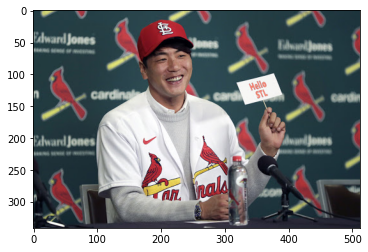

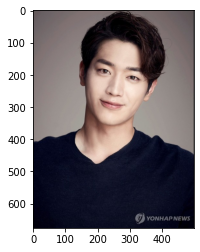

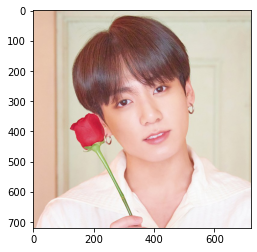

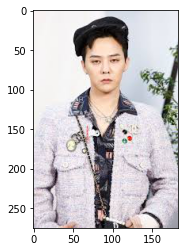

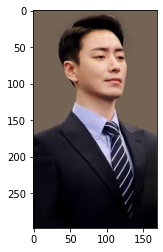

In [ ]:
f_path ='/content/Celebrity'
get_nearest_face('hex',f_path,top=5)

In [ ]:
matching = [s for s in file_list if sorted_faces[i][0] in s] 

AttributeError: ignored

In [ ]:
resultlist = []
for s in some_list:
    if "abc" in s:
        resultlist.append(s)

TypeError: ignored

In [ ]:
list.get_index('김지수.jpg')

AttributeError: ignored